## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import create_df_sc, wrap_labels

## Configuration

In [2]:
# %matplotlib inline
# plt.style.use('fivethirtyeight')
sns.set_theme(context='notebook',style='darkgrid')


## National Travel Survey
[National Travel Survey](https://www150.statcan.gc.ca/n1/daily-quotidien/241128/dq241128d-cansim-eng.htm)

Table 24-10-0045-01: Travel by Canadian residents in Canada and abroad by trip purpose (x 1,000)
* Travels trends, group by destination
* Travels trends, group by purpose
* Number of travels by destination (2023)
* Number of travels by purpose (2023), group by quarter

In [19]:
# read the table
pid = "2410004501"
start_date = "20180101"
selected_members = "[[1,2,3,4],[1,2,3],[1,2,3,4,5,6],[1]]"
period = 'Q'
df = create_df_sc(pid,start_date,selected_members,period)

https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2410004501&latestN=&startDate=20180101&endDate=&csvLocale=en&selectedMembers=%5B%5B1%2C2%2C3%2C4%5D%2C%5B1%2C2%2C3%5D%2C%5B1%2C2%2C3%2C4%2C5%2C6%5D%2C%5B1%5D%5D 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1597 entries, 2018-01-01 to 2024-04-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO                1597 non-null   object
 1   Trip duration      1597 non-null   object
 2   Main trip purpose  1597 non-null   object
 3   Statistics         1597 non-null   object
 4   VALUE              1597 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 74.9+ KB
None 

                 GEO Trip duration       Main trip purpose       Statistics  \
REF_DATE                                                                      
2023-04-01  Overseas     Overnight  Other personal reasons  Number of trips   
2

In [20]:
# Rename columns and index
df=df.rename(columns={'GEO': 'Destination','VALUE': 'Travel'})
df=df.rename_axis('Date')

### Historical Trends
* Seasonality in domestic travels
* Not able to surpass pre-covid, despite population growth in recent years
* US is the first destination for international travels

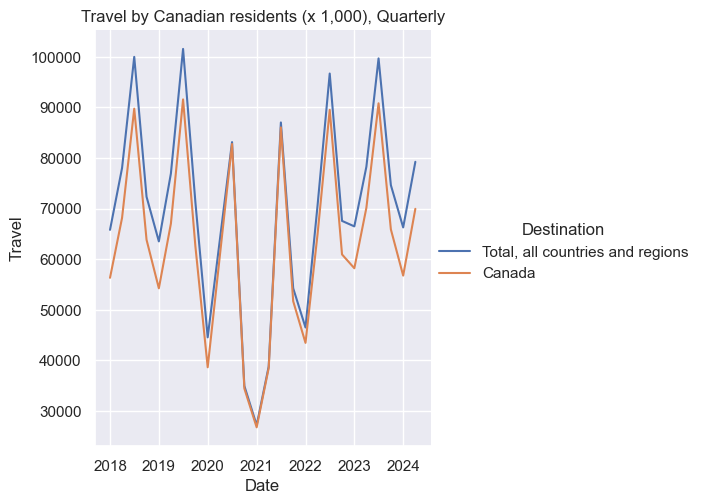

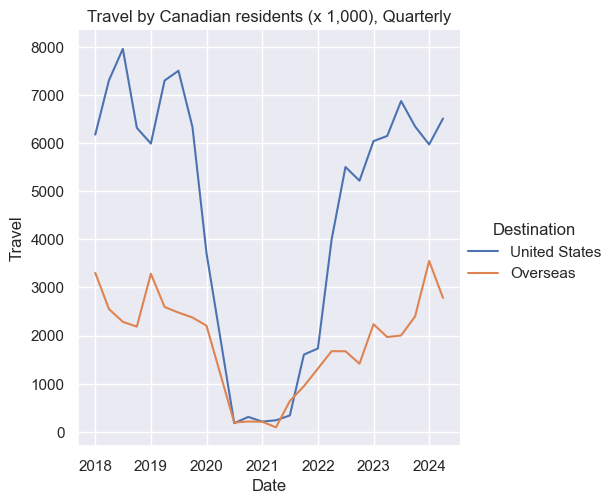

In [5]:
cond_1 = df['Trip duration'] == 'Total, all trip durations'
cond_2 = df['Main trip purpose'] == 'Total, all trip purposes'


cond_3 = (df['Destination'] == 'Total, all countries and regions') | \
    (df['Destination'] == 'Canada')
df_1 = df[cond_1 & cond_2 & cond_3]
sns.relplot(data=df_1, x='Date', y='Travel', kind='line',hue='Destination').set(
    title='Travel by Canadian residents (x 1,000), Quarterly')

cond_3 = (df['Destination'] == "United States") | (df['Destination'] == "Overseas")
df_1 = df[cond_1 & cond_2 & cond_3]
sns.relplot(data=df_1, x='Date', y='Travel', kind='line',hue='Destination').set(
    title='Travel by Canadian residents (x 1,000), Quarterly')

## International Travels, by Trip Purpose

### US

Main trip purpose
Holiday, leisure or recreation                   13021
Visit friends or relatives                        5015
Shopping, non-routine                             3425
Other personal reasons                             954
Personal conference, convention or trade show      426
Name: Travel, dtype: int64 



C:\Users\mghafari\AppData\Local\Temp\2\ipykernel_24696\3064573544.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


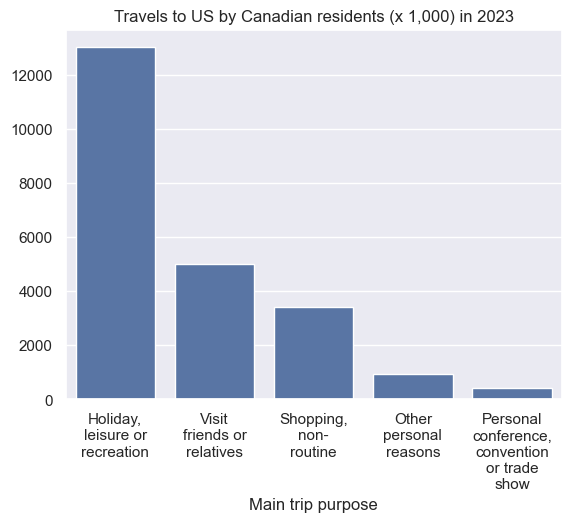

In [33]:
cond_1 = df.index.year == 2023
cond_3 = df['Trip duration'] == 'Total, all trip durations'
cond_2 = df['Main trip purpose'] != 'Total, all trip purposes'
cond_4 = df['Destination'] == 'United States'

df_1 = df[cond_1 & cond_2 & cond_3 & cond_4]
df_2 = df_1.groupby('Main trip purpose')['Travel'].sum().sort_values(ascending=False)
print(df_2,'\n')
ax = sns.barplot(x=df_2.index,y=df_2.values)
ax.set( title='Travels to US by Canadian residents (x 1,000) in 2023')
wrap_labels(ax, 10)

### Overseas

Main trip purpose
Holiday, leisure or recreation                   5704
Visit friends or relatives                       2122
Other personal reasons                            222
Personal conference, convention or trade show      48
Shopping, non-routine                              10
Name: Travel, dtype: int64 



C:\Users\mghafari\AppData\Local\Temp\2\ipykernel_24696\3064573544.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


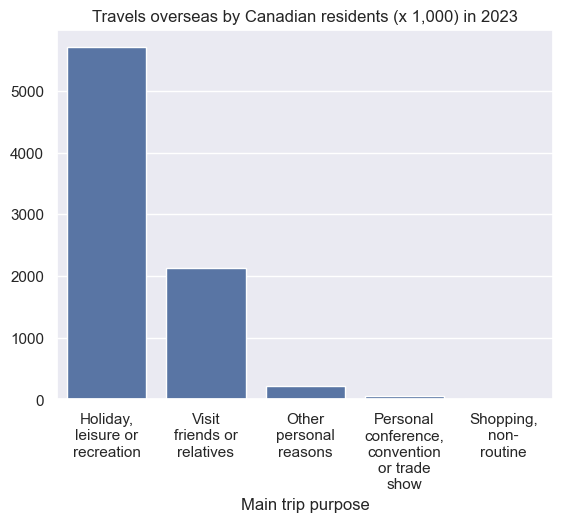

In [35]:
cond_1 = df.index.year == 2023
cond_3 = df['Trip duration'] == 'Total, all trip durations'
cond_2 = df['Main trip purpose'] != 'Total, all trip purposes'
cond_4 = df['Destination'] == 'Overseas'

df_1 = df[cond_1 & cond_2 & cond_3 & cond_4]
df_2 = df_1.groupby('Main trip purpose')['Travel'].sum().sort_values(ascending=False)
print(df_2,'\n')
ax = sns.barplot(x=df_2.index,y=df_2.values)
ax.set( title='Travels overseas by Canadian residents (x 1,000) in 2023')
wrap_labels(ax, 10)